<a href="https://colab.research.google.com/github/victoruwazurike1/Hamoye_Internship_Notebooks/blob/main/classification_tag_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier 
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('energy_data.csv')

In [36]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [37]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [38]:
df = df.drop(columns = 'stab')
df = df.reset_index()

In [39]:
df.head()

,index,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   10000 non-null  int64  
 1   tau1    10000 non-null  float64
 2   tau2    10000 non-null  float64
 3   tau3    10000 non-null  float64
 4   tau4    10000 non-null  float64
 5   p1      10000 non-null  float64
 6   p2      10000 non-null  float64
 7   p3      10000 non-null  float64
 8   p4      10000 non-null  float64
 9   g1      10000 non-null  float64
 10  g2      10000 non-null  float64
 11  g3      10000 non-null  float64
 12  g4      10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [41]:
df['stabf'] = df["stabf"].apply(lambda x: 1 if x == "stable" else 0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   10000 non-null  int64  
 1   tau1    10000 non-null  float64
 2   tau2    10000 non-null  float64
 3   tau3    10000 non-null  float64
 4   tau4    10000 non-null  float64
 5   p1      10000 non-null  float64
 6   p2      10000 non-null  float64
 7   p3      10000 non-null  float64
 8   p4      10000 non-null  float64
 9   g1      10000 non-null  float64
 10  g2      10000 non-null  float64
 11  g3      10000 non-null  float64
 12  g4      10000 non-null  float64
 13  stabf   10000 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 1.1 MB


In [22]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0


In [43]:
X = df.drop(columns = 'stabf')

y = df['stabf']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 1)

In [45]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [46]:
x_train_scaled

array([[-0.80531942,  0.36732671, -0.98604156, ...,  0.33985949,
         0.58556788,  0.49223946],
       [ 0.04247882, -0.06465869,  0.08943734, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-0.84899177, -1.46785   ,  1.29841758, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [-1.42539753,  0.65760851, -0.72275633, ...,  0.29310048,
        -1.55058661,  0.81034412],
       [ 0.06050233, -0.05931596, -1.26053241, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.65762353, -1.47321368,  0.63843757, ..., -1.17410957,
         1.179282  ,  0.78362657]])

In [26]:
y_train.head()

3392    0
3709    1
2610    1
2513    0
2017    1
Name: stabf, dtype: category
Categories (2, int64): [1, 0]

In [47]:
rcf = RandomForestClassifier(random_state = 1)
rcf.fit(x_train_scaled, y_train)
etc = ExtraTreesClassifier(random_state=1)
etc.fit(x_train_scaled, y_train)

ExtraTreesClassifier(random_state=1)

In [48]:
rcf_predictions = rcf.predict(x_test_scaled)
etc_predictions = etc.predict(x_test_scaled)

In [49]:
rcf_accuracy = accuracy_score(rcf_predictions, y_test)
print(rcf_accuracy)
etc_accuracy = accuracy_score(etc_predictions, y_test)
print(etc_accuracy)

0.922
0.9225


In [50]:
xgb = XGBClassifier(random_state=1)
xgb.fit(x_train_scaled, y_train)
xgb_predictions = xgb.predict(x_test_scaled)
print(xgb_predictions)

[0 0 1 ... 1 0 0]


In [51]:
xgb_accuracy = accuracy_score(xgb_predictions, y_test)
xgb_accuracy

0.9195

In [52]:
lgb = LGBMClassifier(random_state=1)
lgb.fit(x_train_scaled, y_train)
lgb_predictions = lgb.predict(x_test_scaled)
lgb_accuracy = accuracy_score(lgb_predictions, y_test)
print(lgb_accuracy)

0.938


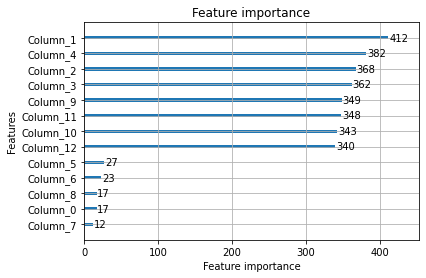

In [54]:
lgbm.plot_importance(lgb)

In [55]:
extra_trees_ft = etc.feature_importances_

In [62]:
features = X.columns
features

Index(['index', 'tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1',
       'g2', 'g3', 'g4'],
      dtype='object')

<BarContainer object of 13 artists>

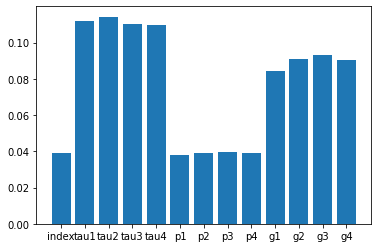

In [64]:
plt.bar(features, extra_trees_ft)